# Genotoxicity Exploratory Data Analysis 🧬

## 1. Problem 🧐

Identify that the compound is **toxic** or **non-toxic**.

Data:
* CSV (IC50 values, MACCS keys, Klekota-Roth and PubChem substructure fingerprints)
* SDF (series of molfiles)

MACCS keys:
* List of 166 (keys) binary values (0 or 1) which characterize a molecule.
Details: https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/MACCSkeys.py

Klekota-Roth fingerprints:
* Set of 4860 chemical substructures (binary values).
Details: 

PubChem fingerprints:
* 881 binary bits (indicate the presence or absence of a certain group of chemical features in a compound).
Details: https://web.cse.ohio-state.edu/~zhang.10631/bak/drugreposition/list_fingerprints.pdf



### 1.1 Libraries 📖

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolToSmiles

pd.set_option('display.max_columns', None)

colors_palette = ['#ffa600','#ff6361','#bc5090','#58508d', '#65345a']

### 1.2 Functions

In [2]:
def annotate(ax, fontsize=12):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ','), 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 6), textcoords = 'offset points', fontsize=fontsize)

## 2. Fingerprints

### 2.1 Data Analyse and Preprocessing 📊

In [4]:
data_path_geno = "../data/raw/genotoxicity_MACCSFP.csv" 
df_geno = pd.read_csv(data_path_geno)
print("Examples: {0}, columns: {1}".format(df_geno.shape[0],df_geno.shape[1]))
df_geno.head()

Examples: 24915, columns: 167


,genotoxicity,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,MACCSFP11,MACCSFP12,MACCSFP13,MACCSFP14,MACCSFP15,MACCSFP16,MACCSFP17,MACCSFP18,MACCSFP19,MACCSFP20,MACCSFP21,MACCSFP22,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP27,MACCSFP28,MACCSFP29,MACCSFP30,MACCSFP31,MACCSFP32,MACCSFP33,MACCSFP34,MACCSFP35,MACCSFP36,MACCSFP37,MACCSFP38,MACCSFP39,MACCSFP40,MACCSFP41,MACCSFP42,MACCSFP43,MACCSFP44,MACCSFP45,MACCSFP46,MACCSFP47,MACCSFP48,MACCSFP49,MACCSFP50,MACCSFP51,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP55,MACCSFP56,MACCSFP57,MACCSFP58,MACCSFP59,MACCSFP60,MACCSFP61,MACCSFP62,MACCSFP63,MACCSFP64,MACCSFP65,MACCSFP66,MACCSFP67,MACCSFP68,MACCSFP69,MACCSFP70,MACCSFP71,MACCSFP72,MACCSFP73,MACCSFP74,MACCSFP75,MACCSFP76,MACCSFP77,MACCSFP78,MACCSFP79,MACCSFP80,MACCSFP81,MACCSFP82,MACCSFP83,MACCSFP84,MACCSFP85,MACCSFP86,MACCSFP87,MACCSFP88,MACCSFP89,MACCSFP90,MACCSFP91,MACCSFP92,MACCSFP93,MACCSFP94,MACCSFP95,MACCSFP96,MACCSFP97,MACCSFP98,MACCSFP99,MACCSFP100,MACCSFP101,MACCSFP102,MACCSFP103,MACCSFP104,MACCSFP105,MACCSFP106,MACCSFP107,MACCSFP108,MACCSFP109,MACCSFP110,MACCSFP111,MACCSFP112,MACCSFP113,MACCSFP114,MACCSFP115,MACCSFP116,MACCSFP117,MACCSFP118,MACCSFP119,MACCSFP120,MACCSFP121,MACCSFP122,MACCSFP123,MACCSFP124,MACCSFP125,MACCSFP126,MACCSFP127,MACCSFP128,MACCSFP129,MACCSFP130,MACCSFP131,MACCSFP132,MACCSFP133,MACCSFP134,MACCSFP135,MACCSFP136,MACCSFP137,MACCSFP138,MACCSFP139,MACCSFP140,MACCSFP141,MACCSFP142,MACCSFP143,MACCSFP144,MACCSFP145,MACCSFP146,MACCSFP147,MACCSFP148,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,11220.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0
1,25918.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,16353.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,1,0,1,0
3,20596.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
4,29081.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0


In [5]:
df_geno_pubch = pd.read_csv("../data/raw/genotoxicity_PubchemFP.csv")
print("Examples: {0}, columns: {1}".format(df_geno_pubch.shape[0],df_geno_pubch.shape[1]))
df_geno_pubch.head()

Examples: 24915, columns: 882


,genotoxicity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,P

In [6]:
df_geno_klek = pd.read_csv("../data/raw/genotoxicity_KlekFP.csv")
print("Examples: {0}, columns: {1}".format(df_geno_klek.shape[0],df_geno_klek.shape[1]))
df_geno_klek.head()

Examples: 24915, columns: 4861


genotoxicity  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  \
0       11220.2      0      0      0      0      0      0      0      0   
1       25918.5      1      0      0      0      0      0      0      0   
2       16353.5      1      0      0      0      0      0      0      0   
3       20596.2      0      0      0      0      0      0      0      0   
4       29081.0      1      0      0      0      0      0      0      0   

   KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  \
0      0       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       1       0       0       0   

   KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       1       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP45  KRFP46  KRFP47  KRFP48  KRFP49  KRFP50  KRFP51  KRFP52  KRFP53  \
0       0       0       0       0       0       0       0       0       0   
1       1       0       0       0       1       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP54  KRFP55  KRFP56  KRFP57  KRFP58  KRFP59  KRFP60  KRFP61  KRFP62  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP63  KRFP64  KRFP65  KRFP66  KRFP67  KRFP68  KRFP69  KRFP70  KRFP71  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP72  KRFP73  KRFP74  KRFP75  KRFP76  KRFP77  KRFP78  KRFP79  KRFP80  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0

### 2.1.1 Missing/Invalid values 🔎

In [7]:
# count missing values
print("Missing values: {0}".format(df_geno.isnull().sum().sum()))
print("Missing values: {0}".format(df_geno_pubch.isnull().sum().sum()))
print("Missing values: {0}".format(df_geno_klek.isnull().sum().sum()))

Missing values: 0
Missing values: 0
Missing values: 0


In [8]:
# Convert non-numeric entries to NaN (everything that cannot be converted to a numeric value)
df_geno2 = (df_geno.drop(df_geno.columns, axis=1)
         .join(df_geno[df_geno.columns].apply(pd.to_numeric, errors='coerce')))

In [9]:
print("Invalid values: {0}".format(df_geno2.isnull().sum().sum()))

Invalid values: 0


### 2.1.2 Class balance/Outliers

In [10]:
df_geno2['genotoxicity'].describe()

count    24915.000000
mean     14669.029376
std       8998.666957
min          0.700000
25%       6510.400000
50%      16353.500000
75%      20596.200000
max      35481.300000
Name: genotoxicity, dtype: float64

In [11]:
non_toxic = df_geno2[df_geno2['genotoxicity']<=15000].count()[0]
toxic = df_geno2[df_geno2['genotoxicity']>15000].count()[0]
all_tox = df_geno2['genotoxicity'].count()
print('For 10000: {0} Toxic compounds and {1} non toxic compounds'.format(toxic, non_toxic))
print('For 10000: {:.2%} Toxic compounds and {:.2%} non toxic compounds'.format(toxic/all_tox, non_toxic/all_tox))

For 10000: 12888 Toxic compounds and 12027 non toxic compounds
For 10000: 51.73% Toxic compounds and 48.27% non toxic compounds


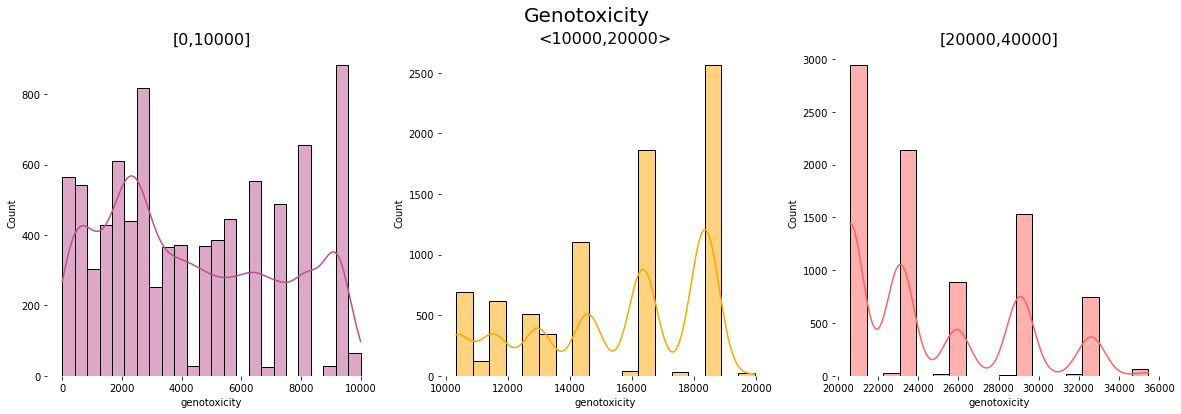

In [12]:
genotoxicity_1 = df_geno2[df_geno2['genotoxicity']<=10000]
genotoxicity_2 = df_geno2[df_geno2['genotoxicity'].between(10000, 20000, inclusive=False)]
genotoxicity_3 = df_geno2[df_geno2['genotoxicity'].between(20000,40000, inclusive=True)]

fig, axes = plt.subplots(1, 3, figsize = (20, 6))
fig.suptitle('Genotoxicity', fontsize=20)
left = sns.histplot(data=genotoxicity_1, x='genotoxicity', ax = axes[0], kde=True, color=colors_palette[2])
center = sns.histplot(data=genotoxicity_2, x='genotoxicity', ax = axes[1], kde=True, color=colors_palette[0])
right = sns.histplot(data=genotoxicity_3, x='genotoxicity', ax = axes[2], kde=True, color=colors_palette[1])
axes[0].set_title('[0,10000]', fontsize=16)
axes[1].set_title('<10000,20000>', fontsize=16)
axes[2].set_title('[20000,40000]', fontsize=16)

sns.despine(left=True, bottom=True)

In [13]:
df_scaled = StandardScaler().fit_transform(df_geno2['genotoxicity'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.63008853]
 [-1.6300663 ]
 [-1.62965512]
 [-1.62965512]
 [-1.62965512]
 [-1.62965512]
 [-1.62965512]
 [-1.62965512]
 [-1.62965512]
 [-1.62958844]]

outer range (high) of the distribution:
[[2.31286349]
 [2.31286349]
 [2.31286349]
 [2.31286349]
 [2.31286349]
 [2.31286349]
 [2.31286349]
 [2.31286349]
 [2.31286349]
 [2.31286349]]


/home/ewelina/miniconda3/envs/admet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


### 2.1.3 Calculate logarithm

1. Convert nM to M.
2. Apply -log10.

genotoxicity -> lower values are better: <=15000 nM -> inactive (non-toxic)

logarithm_of genotoxicity -> higher values are better : >=5 -> inactive (non-toxic).

In [14]:
df_geno2 = df_geno2.assign(genotoxicity = -np.log10(df_geno2.genotoxicity*(10**-9)))
df_geno2

,genotoxicity,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,MACCSFP11,MACCSFP12,MACCSFP13,MACCSFP14,MACCSFP15,MACCSFP16,MACCSFP17,MACCSFP18,MACCSFP19,MACCSFP20,MACCSFP21,MACCSFP22,MACCSFP23,MACCSFP24,MACCSFP25,MACCSFP26,MACCSFP27,MACCSFP28,MACCSFP29,MACCSFP30,MACCSFP31,MACCSFP32,MACCSFP33,MACCSFP34,MACCSFP35,MACCSFP36,MACCSFP37,MACCSFP38,MACCSFP39,MACCSFP40,MACCSFP41,MACCSFP42,MACCSFP43,MACCSFP44,MACCSFP45,MACCSFP46,MACCSFP47,MACCSFP48,MACCSFP49,MACCSFP50,MACCSFP51,MACCSFP52,MACCSFP53,MACCSFP54,MACCSFP55,MACCSFP56,MACCSFP57,MACCSFP58,MACCSFP59,MACCSFP60,MACCSFP61,MACCSFP62,MACCSFP63,MACCSFP64,MACCSFP65,MACCSFP66,MACCSFP67,MACCSFP68,MACCSFP69,MACCSFP70,MACCSFP71,MACCSFP72,MACCSFP73,MACCSFP74,MACCSFP75,MACCSFP76,MACCSFP77,MACCSFP78,MACCSFP79,MACCSFP80,MACCSFP81,MACCSFP82,MACCSFP83,MACCSFP84,MACCSFP85,MACCSFP86,MACCSFP87,MACCSFP88,MACCSFP89,MACCSFP90,MACCSFP91,MACCSFP92,MACCSFP93,MACCSFP94,MACCSFP95,MACCSFP96,MACCSFP97,MACCSFP98,MACCSFP99,MACCSFP100,MACCSFP101,MACCSFP102,MACCSFP103,MACCSFP104,MACCSFP105,MACCSFP106,MACCSFP107,MACCSFP108,MACCSFP109,MACCSFP110,MACCSFP111,MACCSFP112,MACCSFP113,MACCSFP114,MACCSFP115,MACCSFP116,MACCSFP117,MACCSFP118,MACCSFP119,MACCSFP120,MACCSFP121,MACCSFP122,MACCSFP123,MACCSFP124,MACCSFP125,MACCSFP126,MACCSFP127,MACCSFP128,MACCSFP129,MACCSFP130,MACCSFP131,MACCSFP132,MACCSFP133,MACCSFP134,MACCSFP135,MACCSFP136,MACCSFP137,MACCSFP138,MACCSFP139,MACCSFP140,MACCSFP141,MACCSFP142,MACCSFP143,MACCSFP144,MACCSFP145,MACCSFP146,MACCSFP147,MACCSFP148,MACCSFP149,MACCSFP150,MACCSFP151,MACCSFP152,MACCSFP153,MACCSFP154,MACCSFP155,MACCSFP156,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,4.949999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0
1,4.586390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,4.786389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,1,0,1,0
3,4.686213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
4,4.536391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [15]:
df_geno2['genotoxicity'].describe()

count    24915.000000
mean         4.995891
std          0.490238
min          4.450000
25%          4.686213
50%          4.786389
75%          5.186392
max          9.154902
Name: genotoxicity, dtype: float64

### 2.1.4 Classes statistics 📈

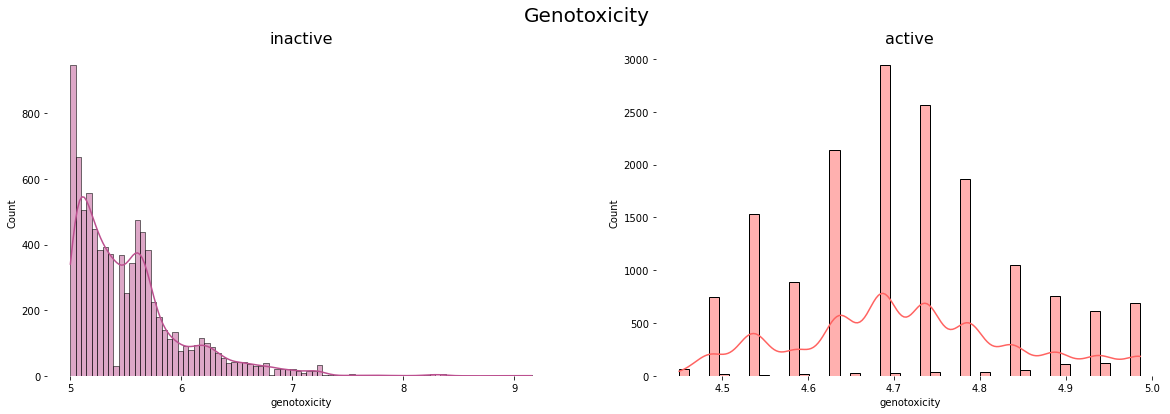

In [16]:
genotoxicity_1 = df_geno2[df_geno2['genotoxicity']<5]
genotoxicity_2 = df_geno2[df_geno2['genotoxicity']>=5] #inactive

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Genotoxicity', fontsize=20)
left = sns.histplot(data=genotoxicity_2, x='genotoxicity', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=genotoxicity_1, x='genotoxicity', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('inactive', fontsize=16)
axes[1].set_title('active', fontsize=16)

sns.despine(left=True, bottom=True)

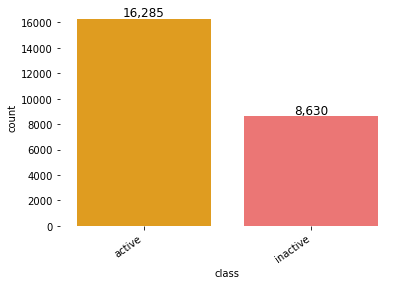

In [17]:
activity_th = []
for i in df_geno2.genotoxicity:
    if float(i) < 5:
        activity_th.append("active")
    elif float(i) >= 5:
        activity_th.append("inactive")
    
activity_class = pd.Series(activity_th, name='class')
class_df = pd.concat([df_geno2, activity_class], axis=1)

a = sns.countplot(x='class', data=class_df, palette=colors_palette)

annotate(a)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

Text(0, 0.5, 'genotoxicity value')

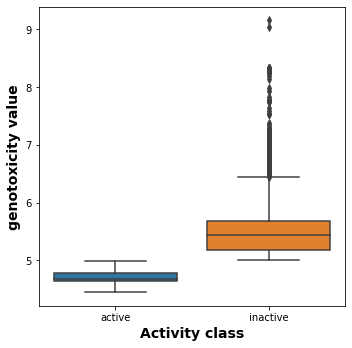

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'genotoxicity', data = class_df)

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('genotoxicity value', fontsize=14, fontweight='bold')

### 2.1.5 Prepare other fingerprints

In [19]:
df_geno_pubch.apply(pd.to_numeric, errors='coerce')
df_geno_pubch = df_geno_pubch.assign(genotoxicity = -np.log10(df_geno_pubch.genotoxicity*(10**-9)))
df_geno_pubch.head()

,genotoxicity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,P

In [20]:
df_geno_klek.apply(pd.to_numeric, errors='coerce')
df_geno_klek = df_geno_klek.assign(genotoxicity = -np.log10(df_geno_klek.genotoxicity*(10**-9)))
df_geno_klek.head()

genotoxicity  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  \
0      4.949999      0      0      0      0      0      0      0      0   
1      4.586390      1      0      0      0      0      0      0      0   
2      4.786389      1      0      0      0      0      0      0      0   
3      4.686213      0      0      0      0      0      0      0      0   
4      4.536391      1      0      0      0      0      0      0      0   

   KRFP9  KRFP10  KRFP11  KRFP12  KRFP13  KRFP14  KRFP15  KRFP16  KRFP17  \
0      0       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       1       0       0       0   

   KRFP18  KRFP19  KRFP20  KRFP21  KRFP22  KRFP23  KRFP24  KRFP25  KRFP26  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       1       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP27  KRFP28  KRFP29  KRFP30  KRFP31  KRFP32  KRFP33  KRFP34  KRFP35  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP36  KRFP37  KRFP38  KRFP39  KRFP40  KRFP41  KRFP42  KRFP43  KRFP44  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP45  KRFP46  KRFP47  KRFP48  KRFP49  KRFP50  KRFP51  KRFP52  KRFP53  \
0       0       0       0       0       0       0       0       0       0   
1       1       0       0       0       1       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP54  KRFP55  KRFP56  KRFP57  KRFP58  KRFP59  KRFP60  KRFP61  KRFP62  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP63  KRFP64  KRFP65  KRFP66  KRFP67  KRFP68  KRFP69  KRFP70  KRFP71  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   KRFP72  KRFP73  KRFP74  KRFP75  KRFP76  KRFP77  KRFP78  KRFP79  KRFP80  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0

### 2.1.6 Save

In [21]:
df_geno2.to_csv('../data/processed/geno_maccs_all.csv', index=False)
df_geno_pubch.to_csv('../data/processed/geno_pubchem_all.csv', index=False)
df_geno_klek.to_csv('../data/processed/geno_klek_all.csv', index=False)

## 3. SDF file

Prepare SDF file with mols. 

### 3.1 Load data

In [22]:
suppl = Chem.SDMolSupplier('../data/raw/genotoxicity_from_chembl_data.sdf')
ms = [x for x in suppl if x is not None]
len(ms)

24915

### 3.2 Preprocess

Convert mols to smiles.

In [23]:
geno_smiles = [MolToSmiles(x,isomericSmiles=False) for x in ms ]
df_geno_smiles = pd.DataFrame(geno_smiles, columns=['smiles'])
df_geno_smiles

,smiles
0,Cc1ccc(NC(=O)c2cc(-c3cccs3)on2)cc1
1,Cc1ccccc1N(C(=O)c1snc(C(N)=O)c1N)C(C(=O)NCC1CC...
2,C(=NNc1ccccn1)c1c[nH]c2ccccc12
3,CCOC(=O)c1[nH]c(C)c(C(=O)c2ccc(C)cc2)c1C
4,Cc1ccc2nc(-c3cccc(S(=O)(=O)N4CC(C)OC(C)C4)c3)c...
...,...
24910,COc1cccc2c1nc(C)c1cc(C)oc12
24911,Cn1c(S)nnc1CCc1nc2ccccc2[nH]1
24912,CN1C(=O)c2cccc3c(S(=O)(=O)N(C)C)ccc1c23
24913,CC1Oc2ccccc2C=C1C=NNc1ccc(C(=O)O)cc1


In [24]:
df_geno_smiles = df_geno_smiles.join(df_geno2['genotoxicity'])
df_geno_smiles

,smiles,genotoxicity
0,Cc1ccc(NC(=O)c2cc(-c3cccs3)on2)cc1,4.949999
1,Cc1ccccc1N(C(=O)c1snc(C(N)=O)c1N)C(C(=O)NCC1CC...,4.586390
2,C(=NNc1ccccn1)c1c[nH]c2ccccc12,4.786389
3,CCOC(=O)c1[nH]c(C)c(C(=O)c2ccc(C)cc2)c1C,4.686213
4,Cc1ccc2nc(-c3cccc(S(=O)(=O)N4CC(C)OC(C)C4)c3)c...,4.536391
...,...,...
24910,COc1cccc2c1nc(C)c1cc(C)oc12,4.836213
24911,Cn1c(S)nnc1CCc1nc2ccccc2[nH]1,4.736390
24912,CN1C(=O)c2cccc3c(S(=O)(=O)N(C)C)ccc1c23,4.686390
24913,CC1Oc2ccccc2C=C1C=NNc1ccc(C(=O)O)cc1,5.936404


### 3.3 Save

In [25]:
df_geno_smiles.to_csv('../data/processed/geno_smiles_all.csv', index=False)